In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("insurance_price_prediction.csv")
df.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,...,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Year,Day,Month_name
0,51.0,Male,5839.0,Married,NaN,Master's,Employed,7.352902,Suburban,Premium,...,588.0,2.0,Average,No,Rarely,Condo,710.0,2023,11,January
1,46.0,Female,917.0,Divorced,3.0,Bachelor's,Employed,18.717685,Suburban,Basic,...,441.0,4.0,Average,No,Rarely,Apartment,638.0,2024,4,June
2,44.0,Male,15982.0,Married,2.0,Bachelor's,Unemployed,49.848348,Urban,Comprehensive,...,699.0,4.0,Average,Yes,Daily,Apartment,605.0,2020,25,August
3,43.0,Male,29894.0,Single,2.0,High School,Unemployed,42.180632,Rural,Comprehensive,...,786.0,8.0,Poor,Yes,Weekly,House,1103.0,2023,27,January
4,52.0,Male,30861.0,Married,2.0,Bachelor's,Self-Employed,NaN,Urban,Basic,...,676.0,8.0,NaN,No,Weekly,Apartment,591.0,2023,9,August


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   35459 non-null  float64
 1   Gender                36000 non-null  object 
 2   Annual Income         34629 non-null  float64
 3   Marital Status        35458 non-null  object 
 4   Number of Dependents  32653 non-null  float64
 5   Education Level       36000 non-null  object 
 6   Occupation            25436 non-null  object 
 7   Health Score          33781 non-null  float64
 8   Location              36000 non-null  object 
 9   Policy Type           36000 non-null  object 
 10  Previous Claims       24949 non-null  float64
 11  Credit Score          31927 non-null  float64
 12  Insurance Duration    36000 non-null  float64
 13  Customer Feedback     33677 non-null  object 
 14  Smoking Status        36000 non-null  object 
 15  Exercise Frequency 

In [4]:
df["Annual_Income"]=df['Annual Income']
df['Credit_Score']=df['Credit Score']
df['Customer_Feedback']=df['Customer Feedback']
df['Education_Level']=df['Education Level']
df['Exercise_Frequency']=df['Exercise Frequency']
df['Health_Score']=df['Health Score']
df['Insurance_Duration']=df['Health Score']
df['Marital_Status']=df['Marital Status']
df['Number_of_Dependents']=df['Number of Dependents']
df['Policy_Type']=df['Policy Type']
df['Previous_Claims']=df['Previous Claims']
df['Property_Type']=df['Property Type']
df['Smoking_Status']=df['Smoking Status']


In [5]:
df.drop(columns=['Annual Income', 'Number of Dependents', 'Health Score', 
                        'Previous Claims', 'Credit Score', 'Insurance Duration', 'Marital Status', 'Education Level','Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 
                        'Property Type'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   35459 non-null  float64
 1   Gender                36000 non-null  object 
 2   Occupation            25436 non-null  object 
 3   Location              36000 non-null  object 
 4   Premium Amount        36000 non-null  float64
 5   Year                  36000 non-null  int64  
 6   Day                   36000 non-null  int64  
 7   Month_name            36000 non-null  object 
 8   Annual_Income         34629 non-null  float64
 9   Credit_Score          31927 non-null  float64
 10  Customer_Feedback     33677 non-null  object 
 11  Education_Level       36000 non-null  object 
 12  Exercise_Frequency    36000 non-null  object 
 13  Health_Score          33781 non-null  float64
 14  Insurance_Duration    33781 non-null  float64
 15  Marital_Status     

In [20]:
df.to_csv("insurance_dataset.csv",index=False)

In [21]:
data=pd.read_csv("insurance_dataset.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   35459 non-null  float64
 1   Gender                36000 non-null  object 
 2   Occupation            25436 non-null  object 
 3   Location              36000 non-null  object 
 4   Premium Amount        36000 non-null  float64
 5   Year                  36000 non-null  int64  
 6   Day                   36000 non-null  int64  
 7   Month_name            36000 non-null  object 
 8   Annual_Income         34629 non-null  float64
 9   Credit_Score          31927 non-null  float64
 10  Customer_Feedback     33677 non-null  object 
 11  Education_Level       36000 non-null  object 
 12  Exercise_Frequency    36000 non-null  object 
 13  Health_Score          33781 non-null  float64
 14  Insurance_Duration    33781 non-null  float64
 15  Marital_Status     

In [9]:
df.describe(include="O").T

,count,unique,top,freq
Gender,36000,2,Female,18023
Marital Status,35458,3,Single,11956
Education Level,36000,4,PhD,9255
Occupation,25436,3,Employed,8647
Location,36000,3,Suburban,12133
Policy Type,36000,3,Comprehensive,12060
Customer Feedback,33677,3,Average,11452
Smoking Status,36000,2,No,18108
Exercise Frequency,36000,4,Weekly,9115
Property Type,36000,3,Condo,12126


**EXPLORING DATA**

In [10]:
num_att=[att for att in df.columns if df[att].dtype!='O']
cat_att=[att for att in df.columns if df[att].dtype=="O"]

In [11]:
for att in cat_att:
    if att=="Policy Start Date":
        continue
    else:
        print(f'{att} : {df[att].nunique()} : {df[att].unique()}')
        print()

Gender : 2 : ['Male' 'Female']

Marital Status : 3 : ['Married' 'Divorced' 'Single' nan]

Education Level : 4 : ["Master's" "Bachelor's" 'High School' 'PhD']

Occupation : 3 : ['Employed' 'Unemployed' 'Self-Employed' nan]

Location : 3 : ['Suburban' 'Urban' 'Rural']

Policy Type : 3 : ['Premium' 'Basic' 'Comprehensive']

Customer Feedback : 3 : ['Average' 'Poor' nan 'Good']

Smoking Status : 2 : ['No' 'Yes']

Exercise Frequency : 4 : ['Rarely' 'Daily' 'Weekly' 'Monthly']

Property Type : 3 : ['Condo' 'Apartment' 'House']

Month_name : 12 : ['January' 'June' 'August' 'December' 'November' 'May' 'February' 'April'
 'July' 'March' 'October' 'September']



**DATA VISUALIZATION**

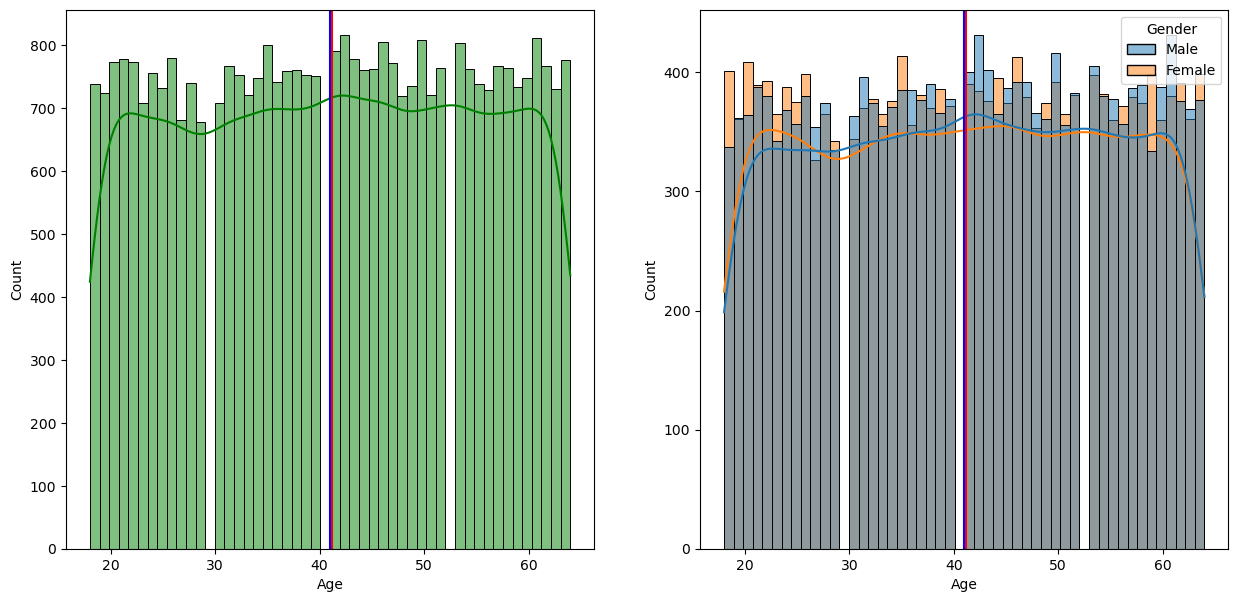

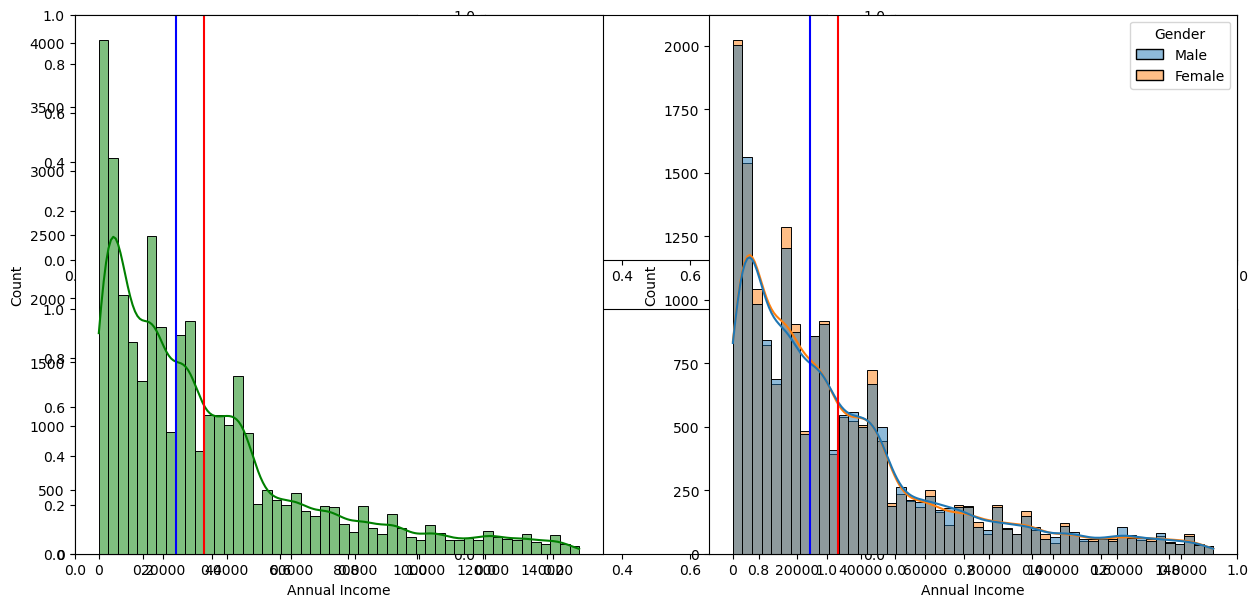

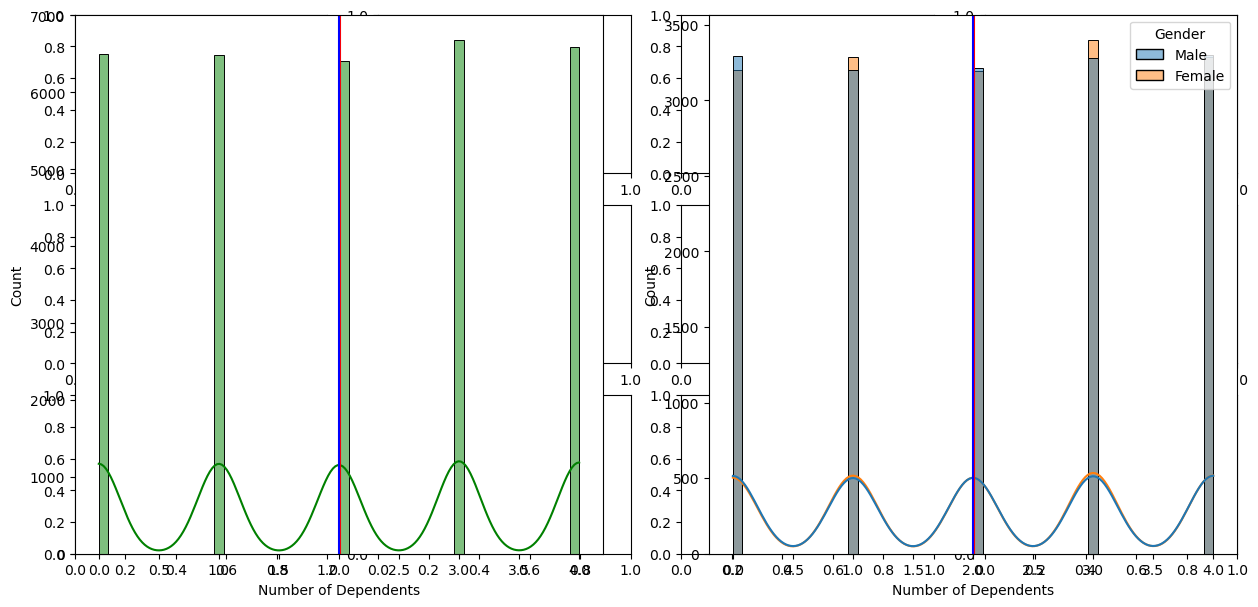

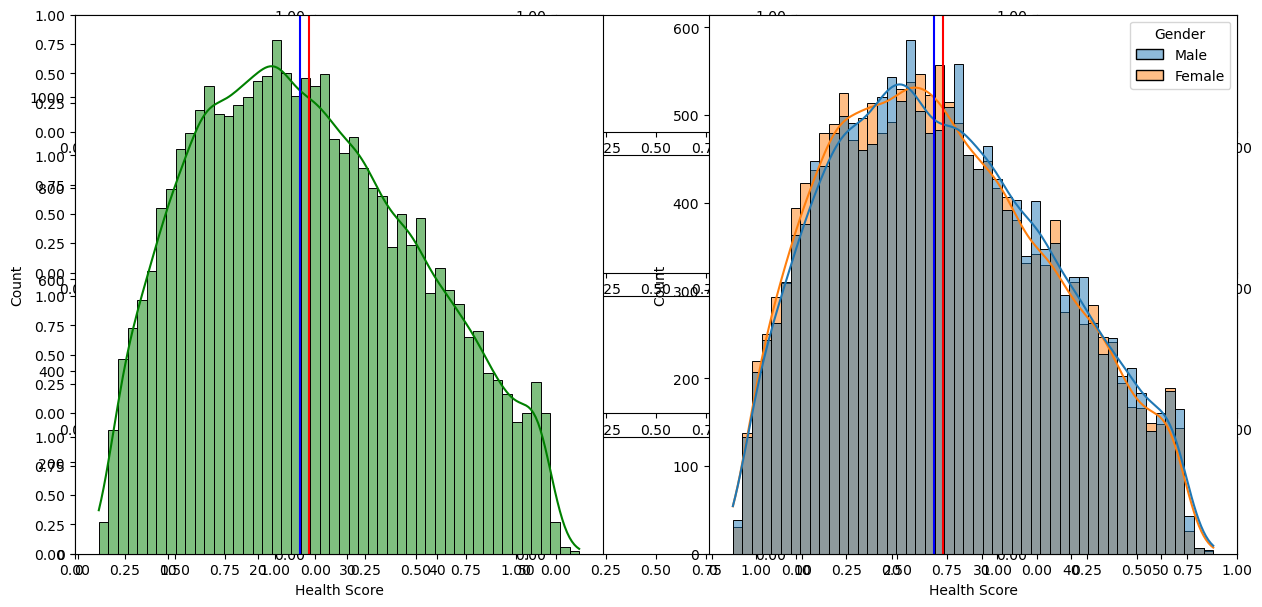

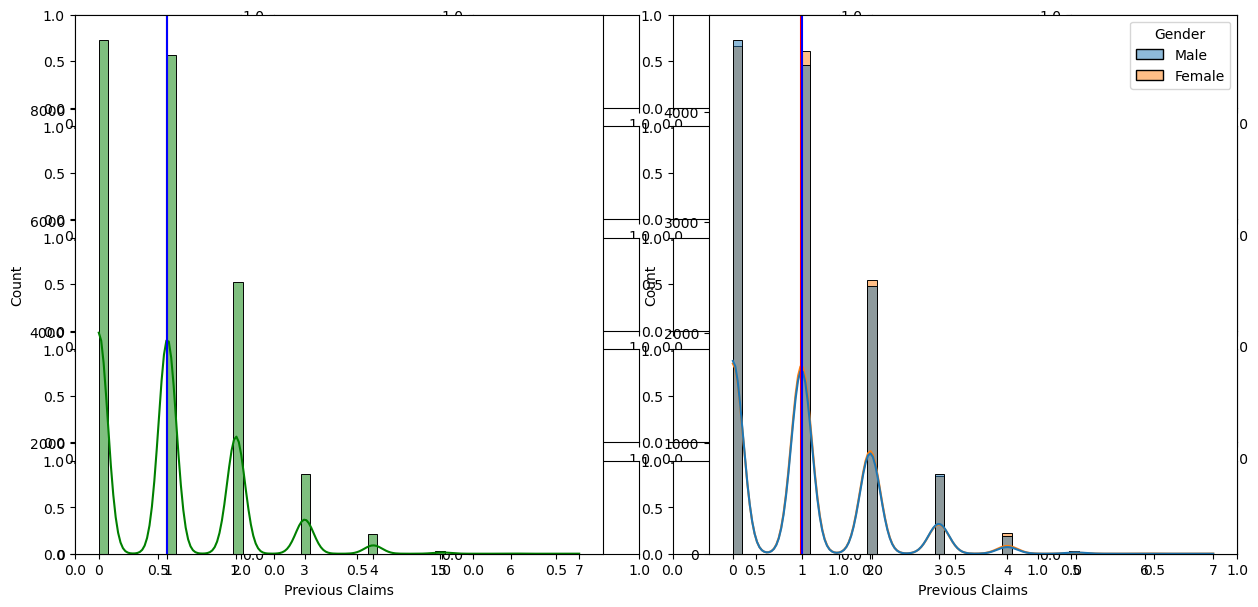

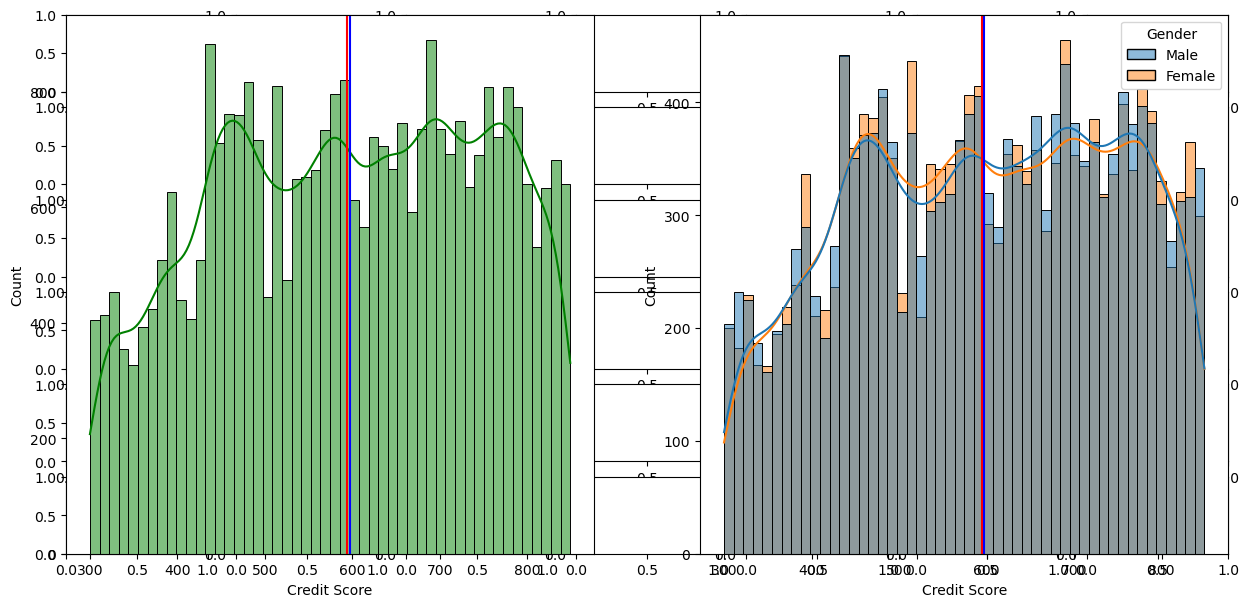

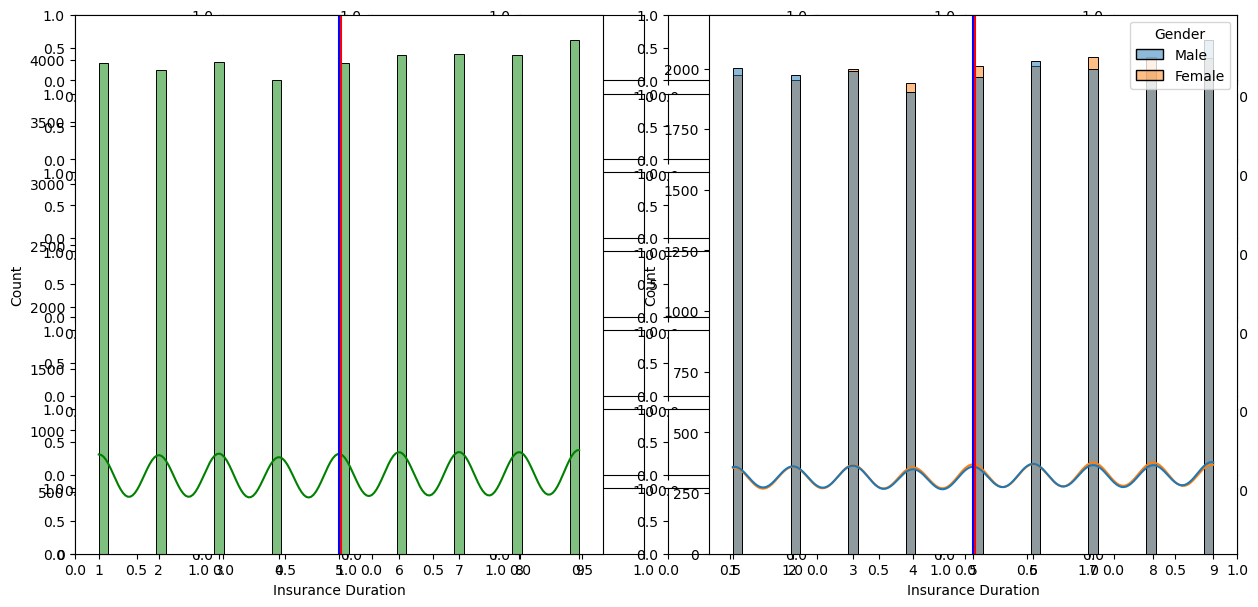

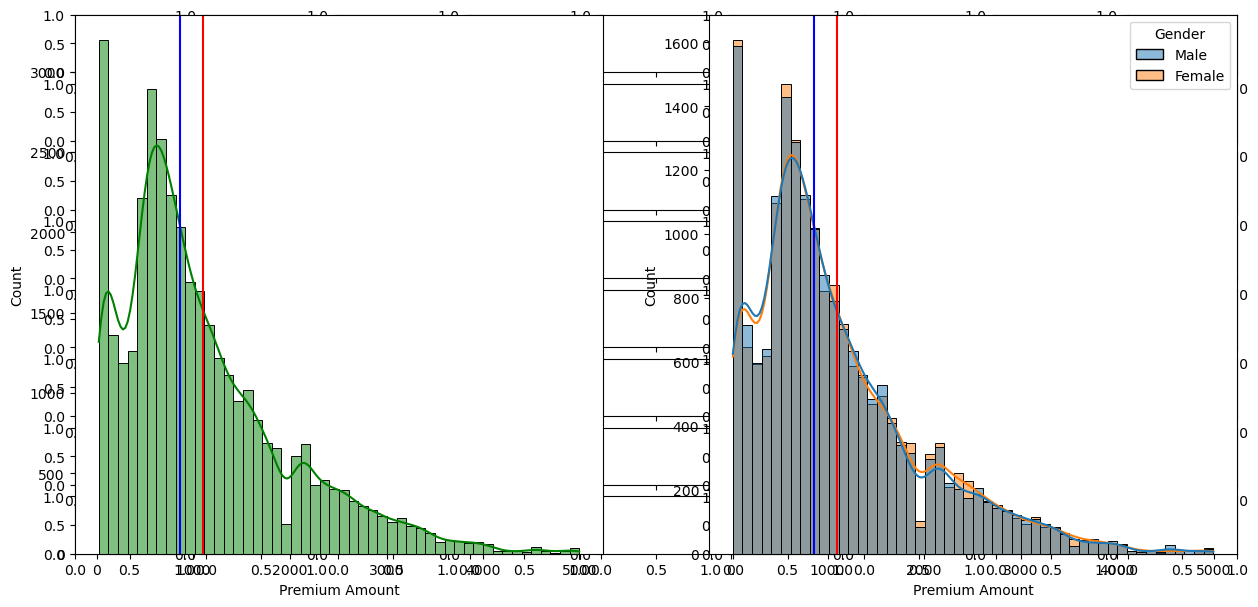

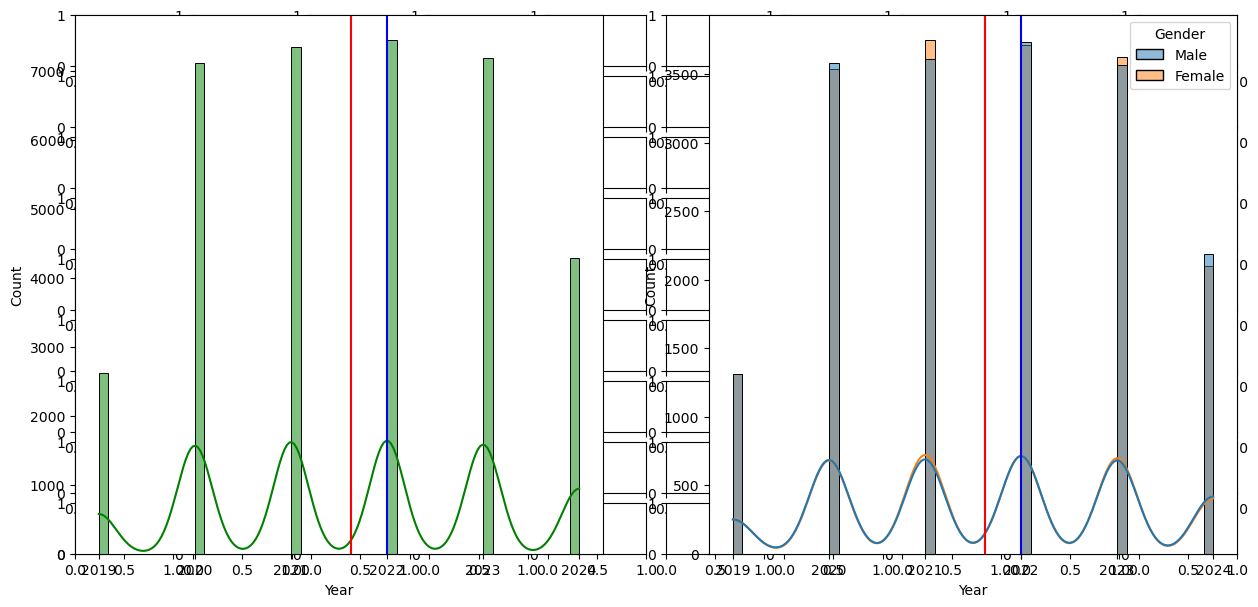

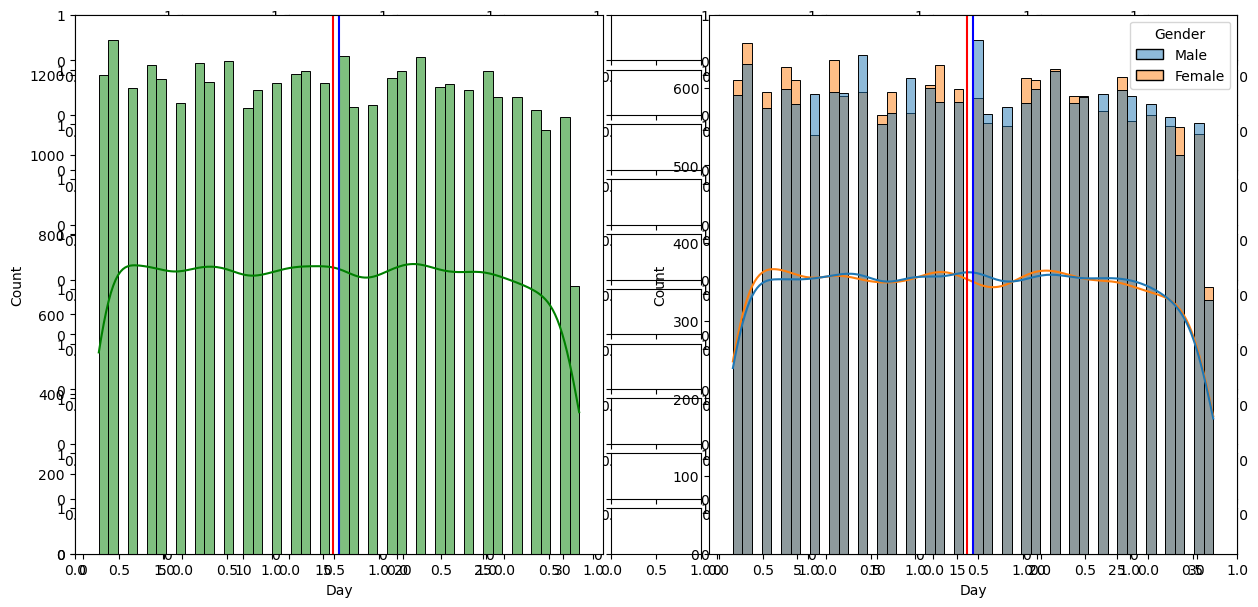

In [12]:
for i in range(0,len(num_att)):
    fig,axs=plt.subplots(i+1,i+2,figsize=(15,7))
    plt.subplot(121)
    sns.histplot(data=df,x=num_att[i],bins=50,kde=True,color='g')
    plt.axvline(df[num_att[i]].mean(),color='red')
    plt.axvline(df[num_att[i]].median(),color='blue')
    plt.subplot(122)
    sns.histplot(data=df,x=num_att[i],bins=50,kde=True,hue='Gender')
    plt.axvline(df[num_att[i]].mean(),color='red')
    plt.axvline(df[num_att[i]].median(),color='blue')
    plt.show()
    

In [19]:
data=df.copy()
data=data.dropna()

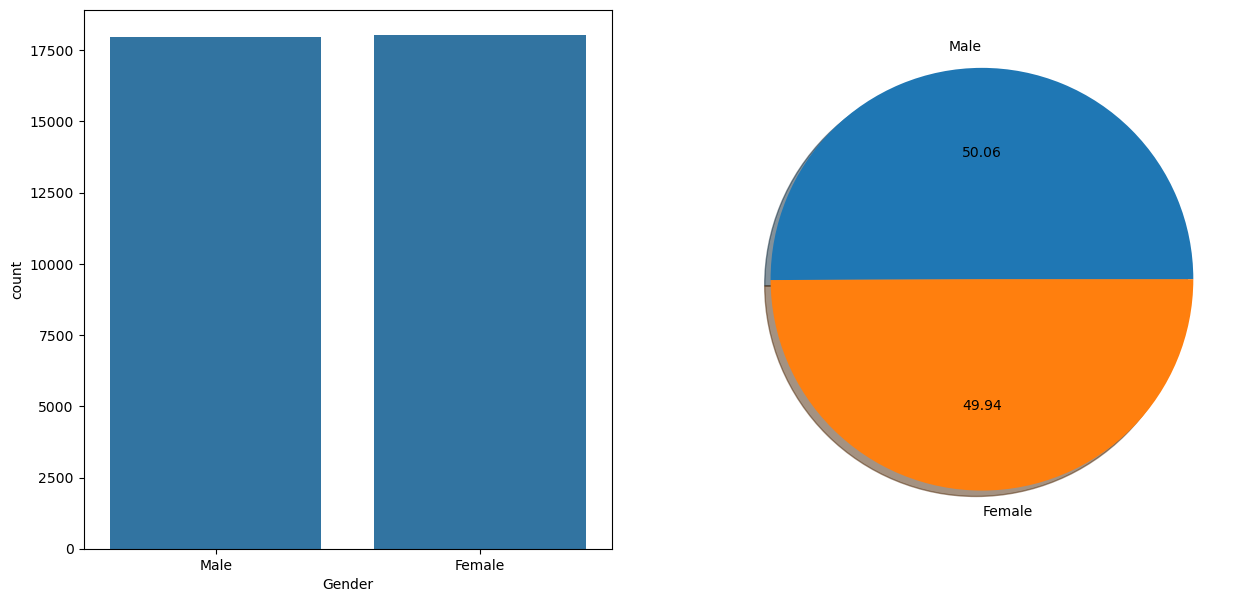

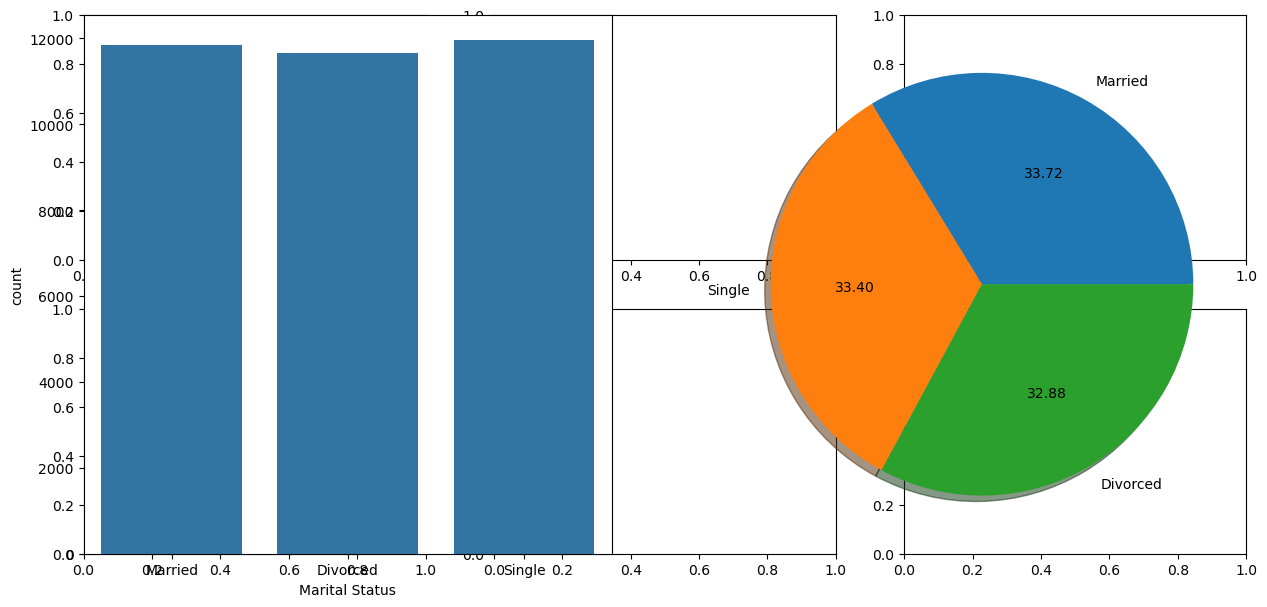

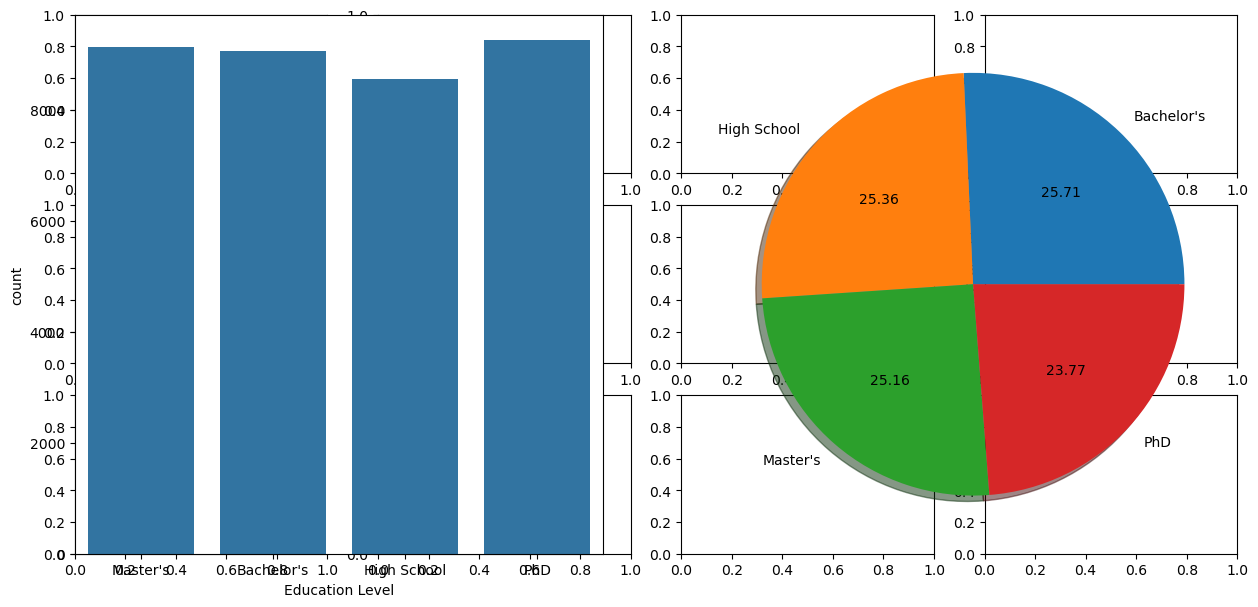

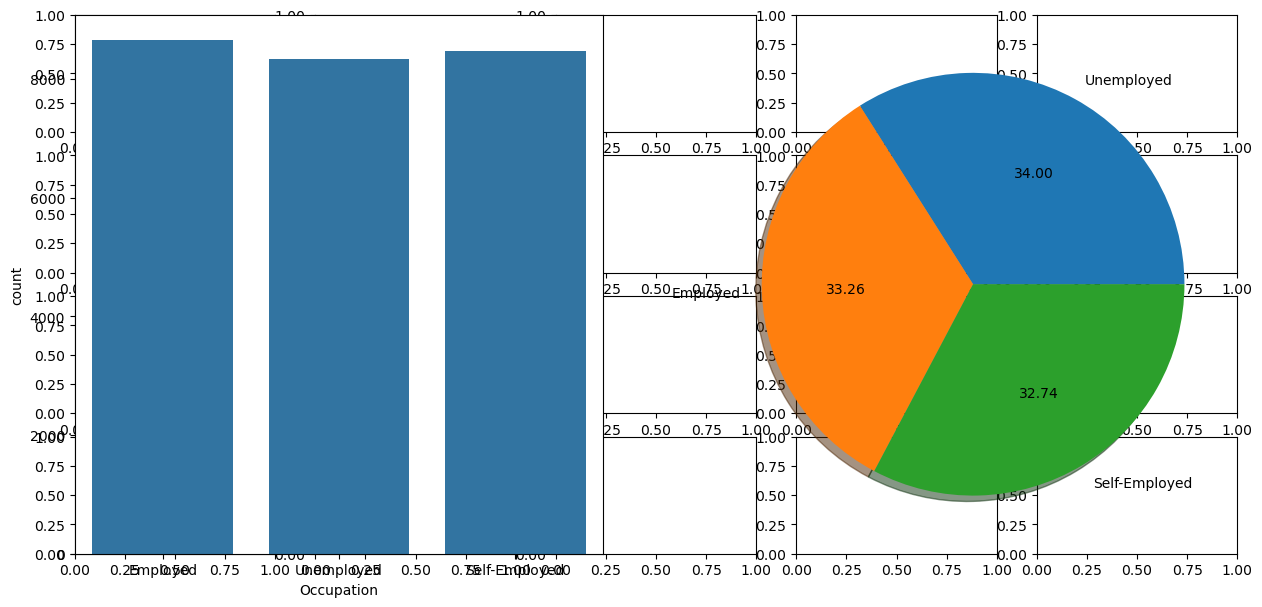

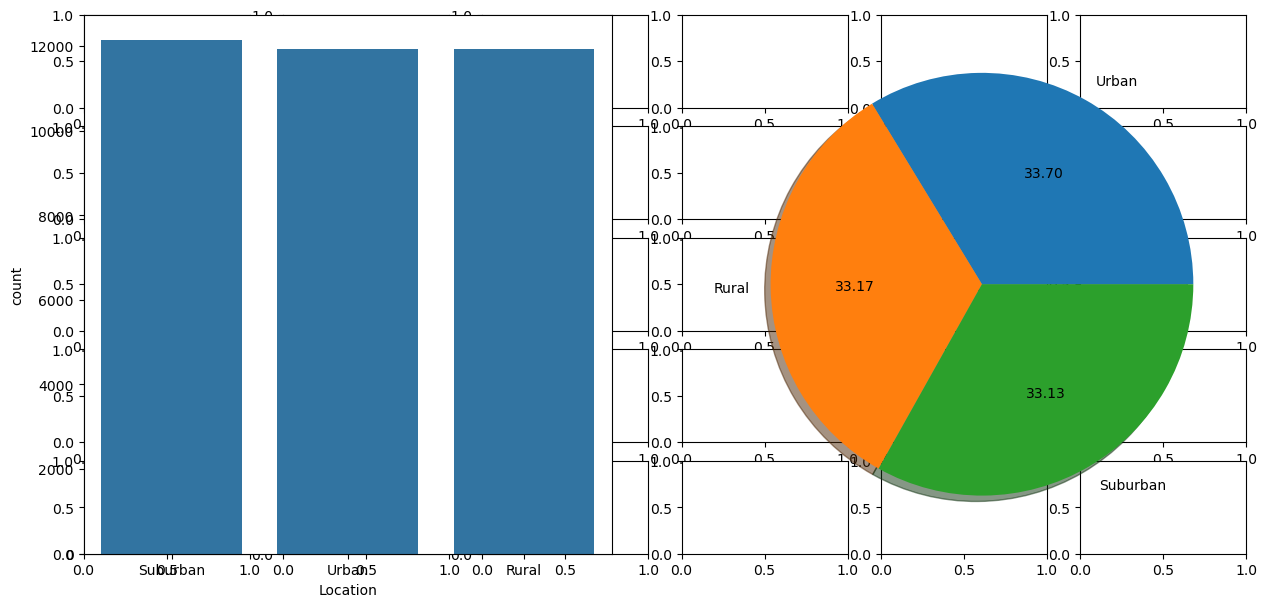

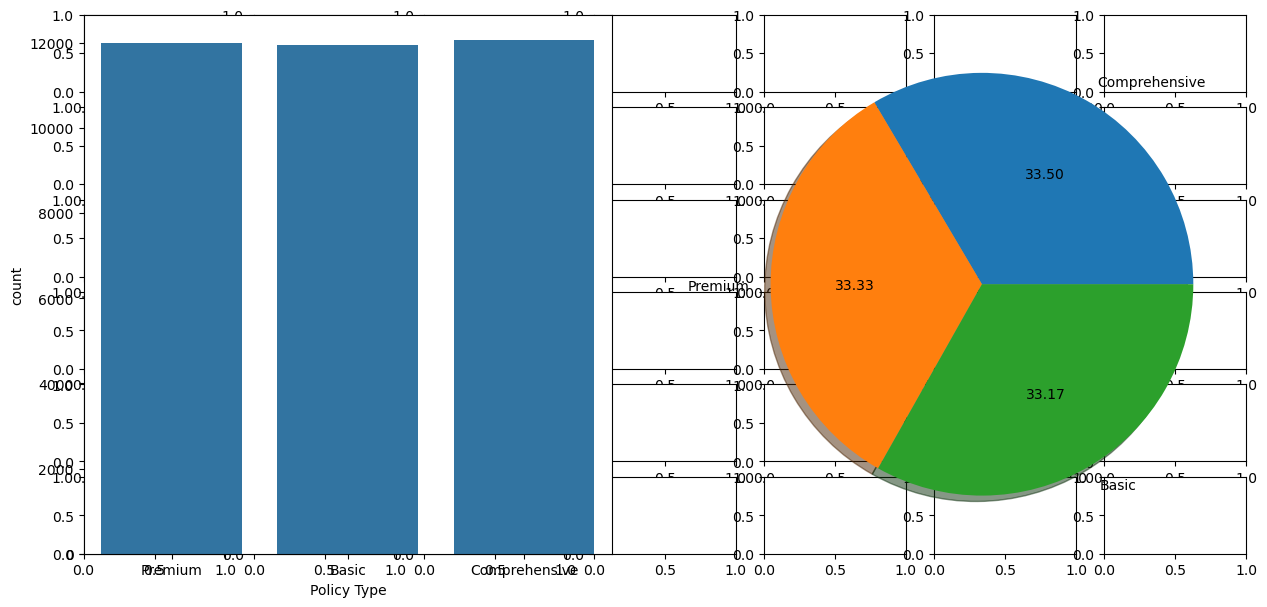

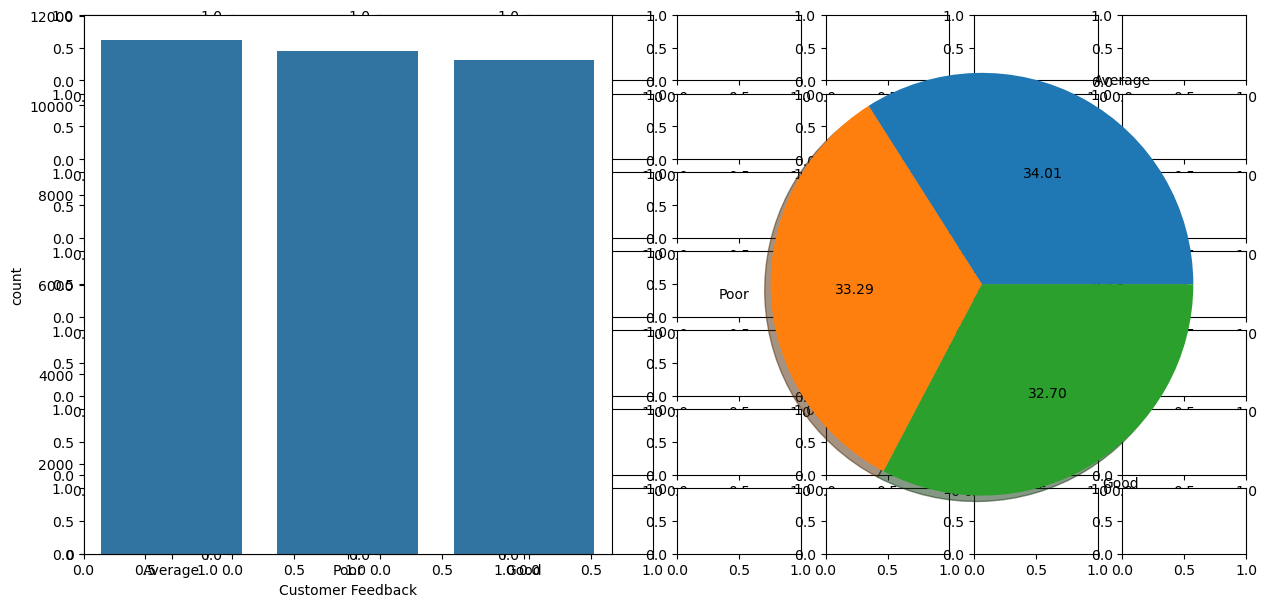

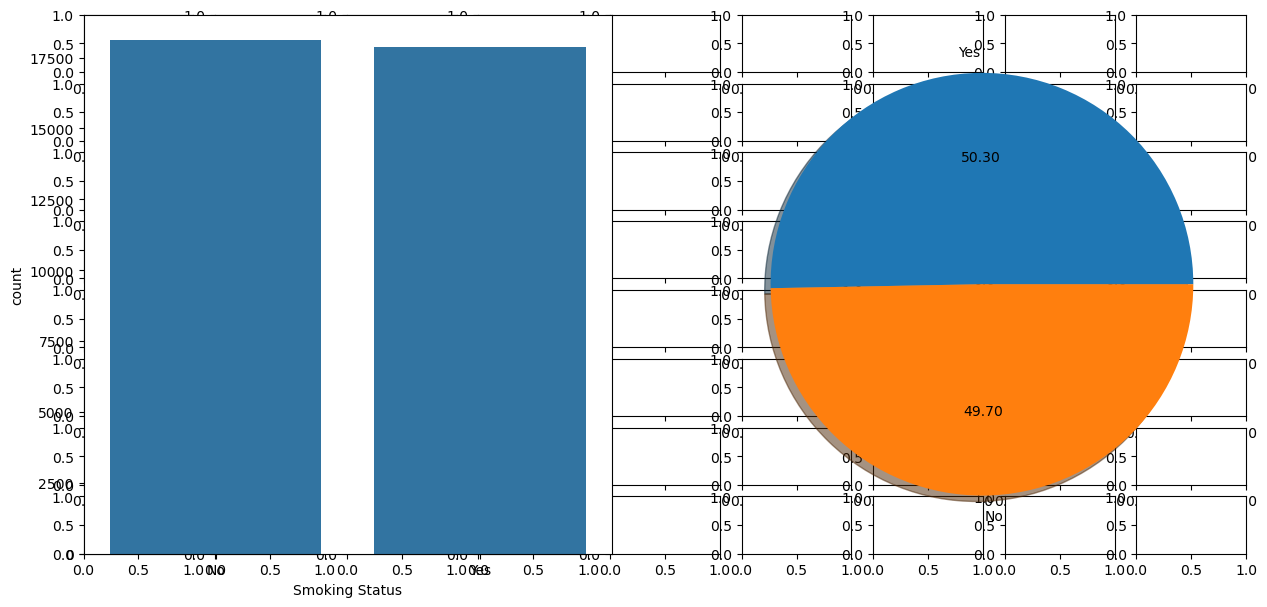

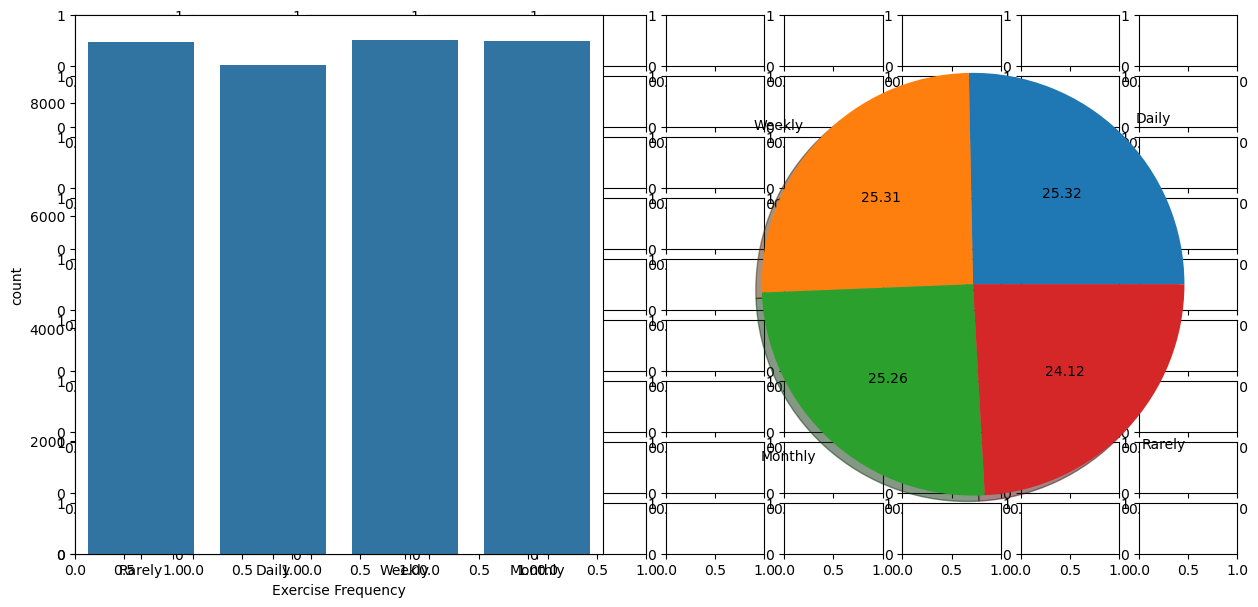

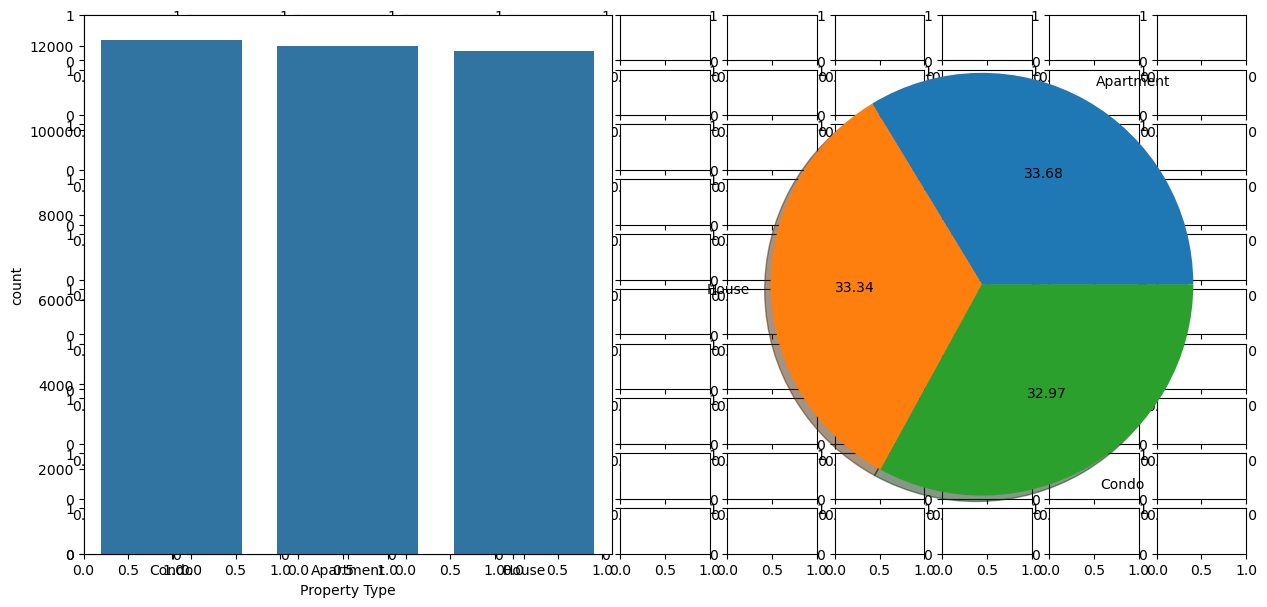

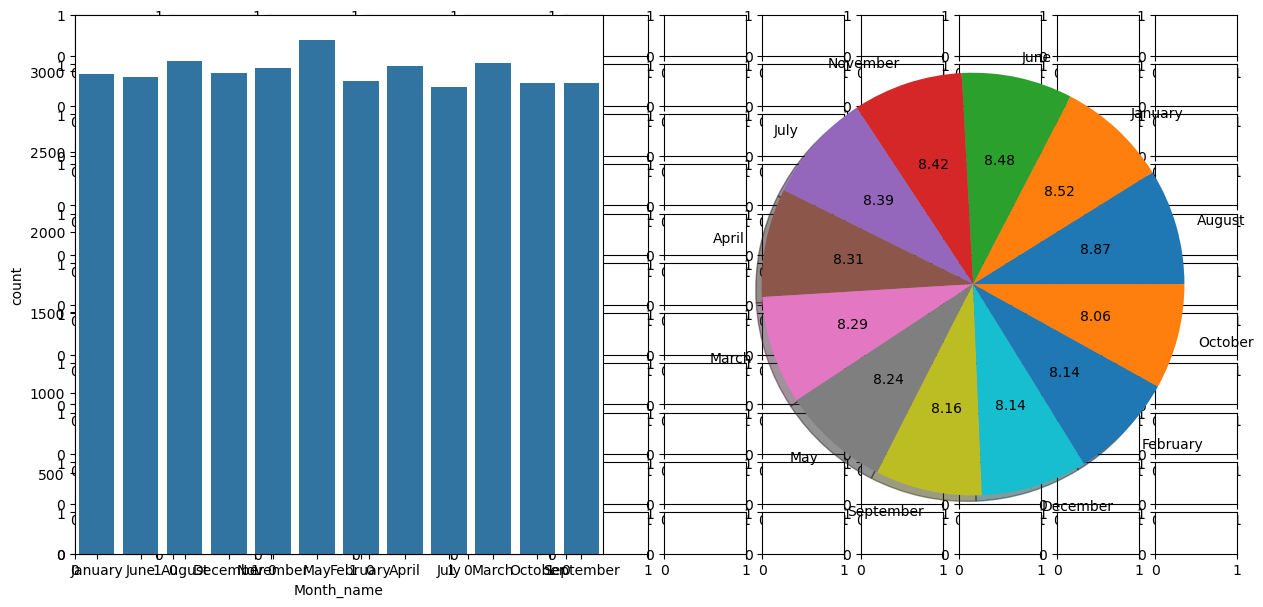

In [18]:
for i in range(0,len(cat_att)):
    fig,axs=plt.subplots(i+1,i+2,figsize=(15,7))
    plt.subplot(121)
    sns.countplot(data=df,x=cat_att[i])
    
    plt.subplot(122)
    plt.pie(df[cat_att[i]].value_counts(),labels=data[cat_att[i]].unique(),autopct='%1.2f',shadow=True)
    plt.show()

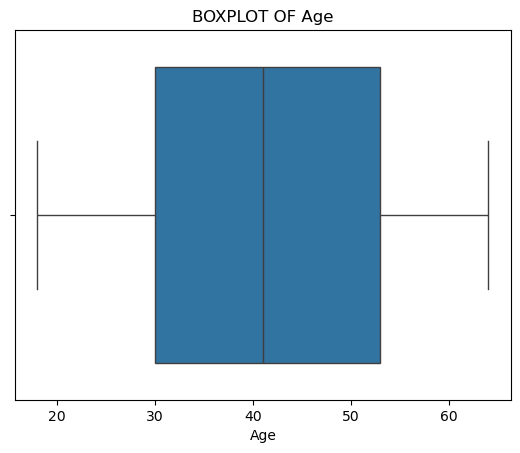

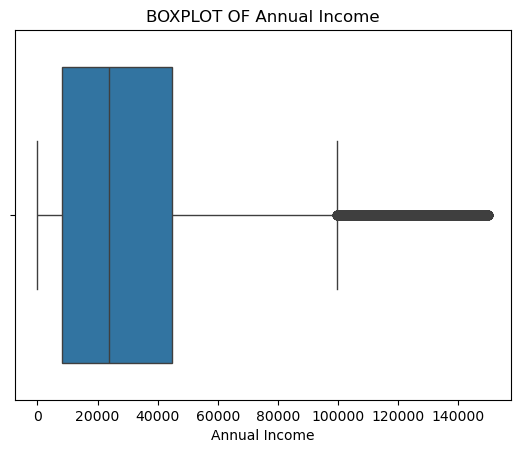

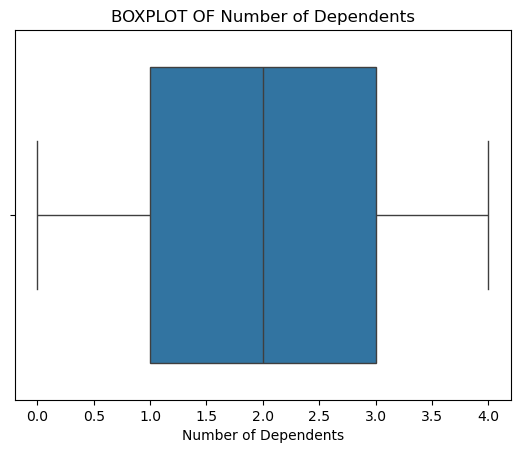

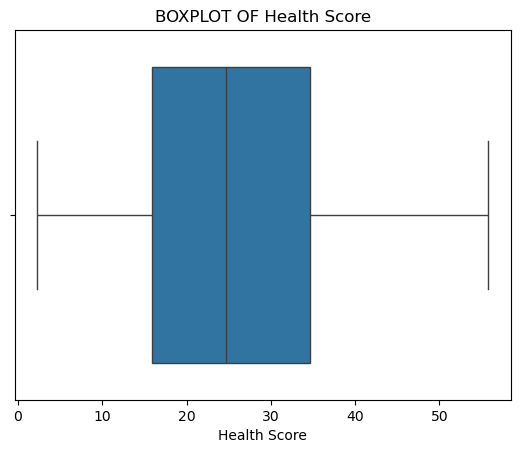

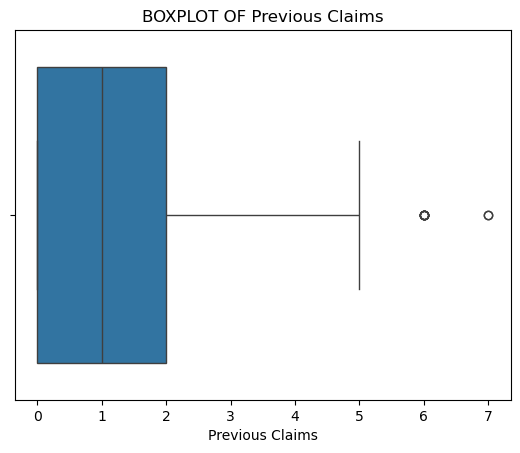

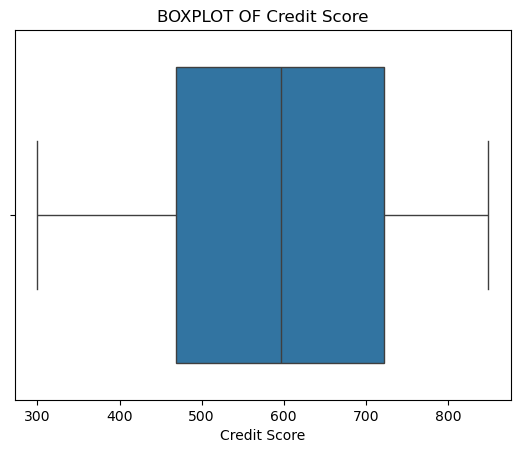

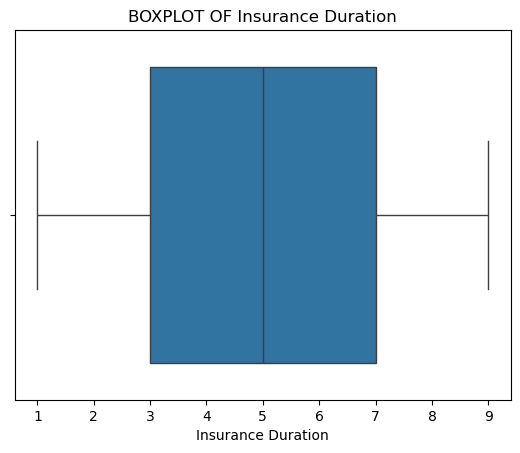

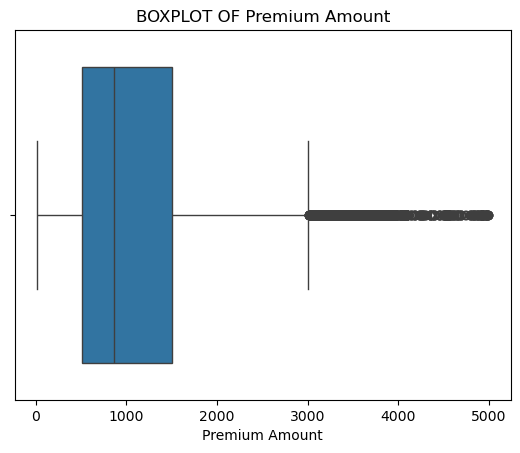

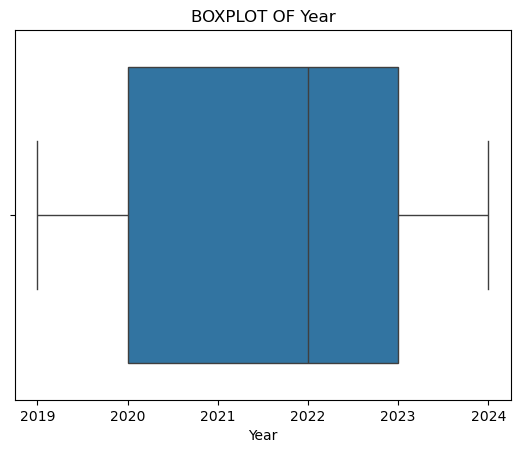

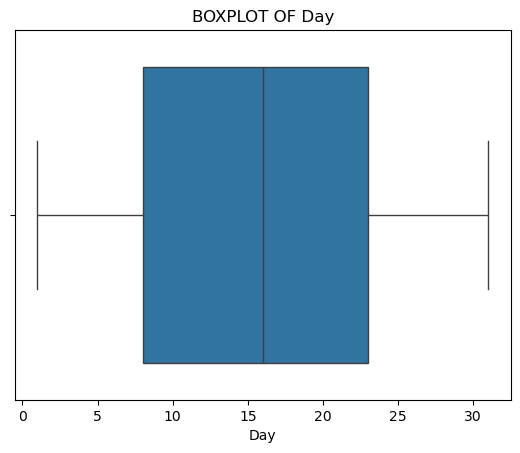

In [20]:
for att in num_att:
    if att=='Policy Start Date':
        continue
    else:
        plt.title(f"BOXPLOT OF {att}")
        sns.boxplot(data=df,x=att)
        plt.show()

## **CONCLUSIONS** ##

1.The dataset contains the null values 

2.All the Categorical features are balanced

3.Incase of the numerical features Two features contains the Outliers and both the features is Right skewed data